Introducción

En este laboratorio, vas a:

Utilizar el conjunto de datos California Housing incluido en scikit-learn para predecir el precio medio de una vivienda en función de varios atributos.

Crear un modelo de regresión con Random Forest y evaluar su desempeño.

Investigar la importancia de las características dentro del modelo.

Tu objetivo en este laboratorio no es encontrar el mejor regresor; el propósito principal es practicar la interpretación de resultados de modelado en el contexto de un problema del mundo real.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

### Cargar el conjunto de datos de viviendas de California

In [2]:
data = fetch_california_housing()
X, y = data.data, data.target

### Carga el conjunto de datos de viviendas de California

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Ejercicio 1. Divide los datos en conjuntos de entrenamiento y prueba

Reserva el 20% de los datos para la evaluación.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Explora los datos de entrenamiento

In [6]:
eda = pd.DataFrame(data=X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Ejercicio 2. ¿En qué rango se encuentran la mayoría de los valores de los precios medianos de las casas?

Considerando el rango entre el percentil 25 y el percentil 75, la mayoría de los precios medianos de las casas se encuentran entre $119,300 y $265,000.

¿Cómo se distribuyen los precios medianos de las casas?

Text(0, 0.5, 'Frequency')

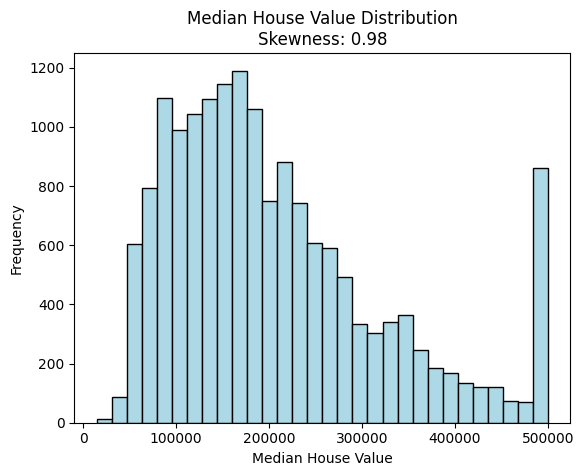

In [7]:
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

Evidentemente, la distribución está sesgada y hay varios valores “recortados” alrededor de los **$500,000**.


Ajuste del modelo y predicción
Ajustemos un modelo de regresión con Random Forest a los datos y utilicémoslo para hacer predicciones del precio medio de las casas.
Usemos los parámetros predeterminados, que incluyen 100 estimadores base (árboles de regresión).

In [8]:
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred_test = rf_regressor.predict(X_test)

Estimar MAE, MSE, RMSE y R² fuera de muestra

In [9]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3276
Mean Squared Error (MSE): 0.2556
Root Mean Squared Error (RMSE): 0.5055
R² Score: 0.8050


### Ejercicio 3. ¿Qué significan estas estadísticas para ti?

¿Qué tan cómodo te sentirías deteniéndote aquí y comunicando los resultados al equipo directivo (C-suite)?**

El error absoluto medio es de $33,220.
Entonces, en promedio, los precios medianos de las casas predichos tienen un error de alrededor de $33,000.

El error cuadrático medio (MSE) es menos intuitivo de interpretar, pero suele ser la métrica que el modelo minimiza durante el ajuste.

Por otro lado, tomar la raíz cuadrada del MSE da un valor en dólares; aquí el RMSE = $50,630.

Un R-cuadrado de 0.80 no se considera muy alto. Significa que el modelo explica aproximadamente 80% de la variación en los precios medianos de las casas, aunque esta interpretación puede ser engañosa cuando se trata de datos complejos con relaciones no lineales, valores sesgados y valores atípicos. Aun así, el R-cuadrado puede ser útil para comparar modelos.

### Graficar Valores Reales vs. Predichos

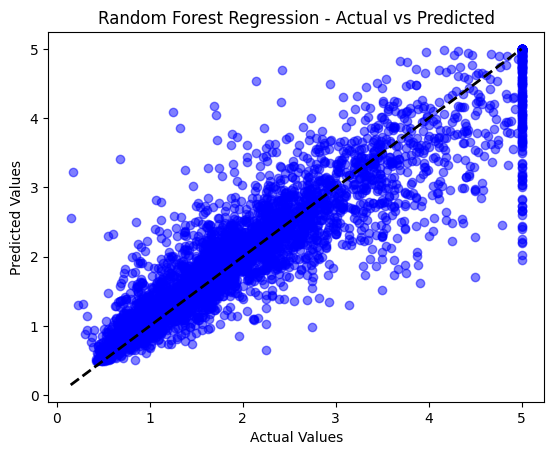

In [10]:
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

Ejercicio 4. Grafica el histograma de los errores residuales (en dólares)

Además, imprime la media y la desviación estándar de los residuales.
Verifica si hay algún patrón.

Average error = -1215
Standard deviation of error = 50537


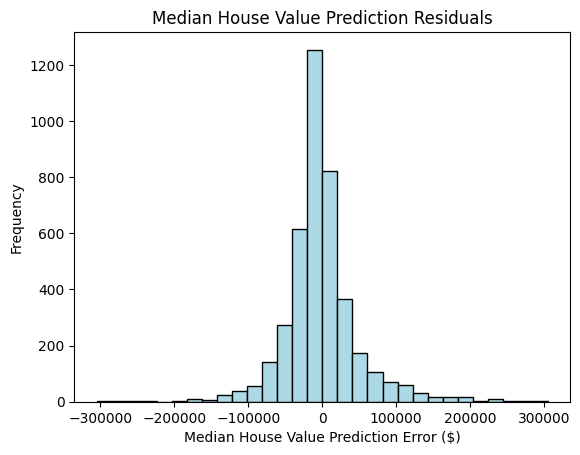

In [11]:
residuals = 1e5*(y_test - y_pred_test)

# Plot the histogram of the residuals
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print('Average error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))

Los residuales se distribuyen normalmente, con un error promedio muy pequeño y una desviación estándar de aproximadamente $50,000.


### Ejercicio 5. Grafica los errores residuales del modelo según el valor medio de la vivienda.

Ordena los residuales según el valor medio real de la vivienda antes de graficarlos.

Verifica si hay algún patrón.

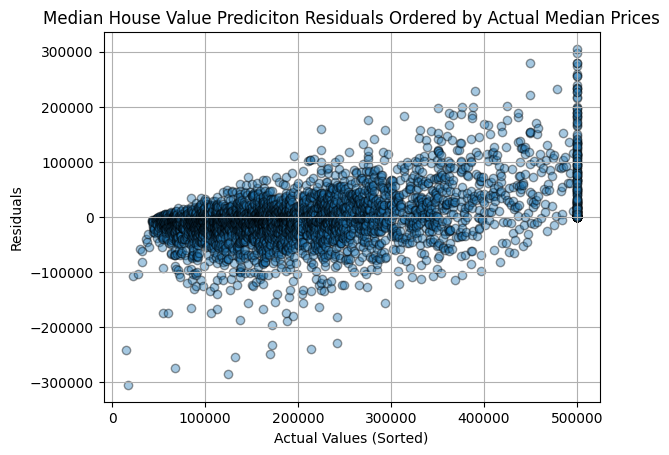

In [12]:
# Create a DataFrame to make sorting easy
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Ejercicio 6. ¿Qué tendencia puedes inferir a partir de este gráfico de residuales?

Aunque observamos un residuo promedio pequeño de solo -$1,400, se puede ver en este gráfico que el error promedio en función del valor medio de la vivienda en realidad aumenta de valores negativos a positivos. En otras palabras, los precios medianos más bajos tienden a ser sobreestimados, mientras que los precios medianos más altos tienden a ser subestimados.

Ejercicio 7. Muestra la importancia de las características en un gráfico de barras.

¿Crees que estos pesos de las características tienen significado práctico? ¿Es posible que algunas características compartan importancia con otras características correlacionadas?

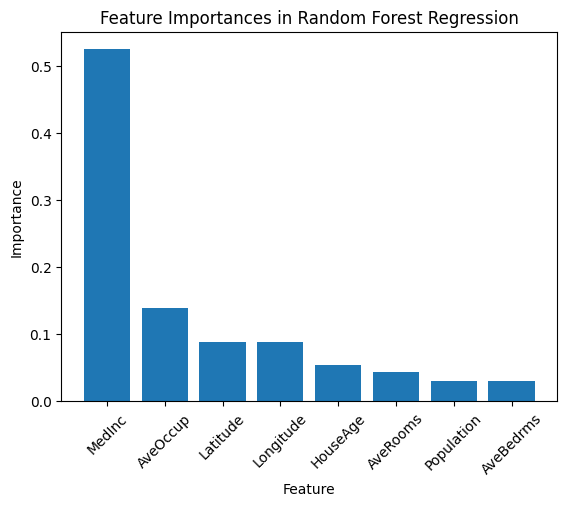

In [13]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()

Tiene sentido que los ingresos medios y los precios de las viviendas estén correlacionados, por lo que no es sorprendente que el ingreso medio sea la característica más importante.

Considero que la ubicación debe ser un factor significativo.

Dado que la ubicación está representada por dos variables separadas, latitud y longitud, que comparten igual importancia, podríamos especular que la ubicación es realmente la segunda característica más importante. Esto se debe a que reemplazar latitud y longitud con una ubicación categórica en un nivel de granularidad adecuado (suburbio, ciudad, etc.) probablemente tendría una importancia combinada lat/lng, que podría superar a la ocupación promedio.

¿Podrían estar correlacionados la ocupación promedio y el número promedio de habitaciones?

Un análisis adecuado del conjunto de características incluiría una matriz de correlación.

### Ejercicio 8. Algunas reflexiones finales a considerar

¿Afectará la asimetría (skewness) al rendimiento de la regresión con Random Forest?

¿Sesga la predicción el recorte de los precios medianos de la vivienda por encima de $500,000?

Además, ¿es necesario estandarizar los datos?

Compared to linear regression, random forest regression is quite robust against outliers and skewed distributions.
This is because random forest regression doesn't make any assumptions about the data distribution, where linear regression performs best with normally distributed data.

Standardizing the data isn't necessary like it is for distance-based algortihms like KNN or SVMs.

Regarding the clipped vlaues, there is no variablilty in those values. Removing them in preprocessing might help the model to better explain the actual variance in the data.

The clipped values can also bias the predictions.
Also these clipped values can mislead evaluation metrics. As you've learned from this lab, it's crucially important for you to visualize your results.